In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

In [2]:
# preprocessing function
def preprocessing_data(df: pd.DataFrame):
    data = df.copy()
    # drop NaN values for some columns
    data = data.dropna(subset=['education_level','major_discipline', 'experience', 'last_new_job'])
    # Replace other NaN with Unknown value 
    data = data.replace(np.nan,'Unknown')
    # relevent_experience replace with 0 and 1, 1 for having experience and 0 for no experience
    data['relevent_experience'] = data['relevent_experience'].replace(['Has relevent experience','No relevent experience'],[1,0])

    # manually assign ordinal numbers to education_level and company_size
    # for graduate level I will give 1 and for master 2 and for phd 3. Graduate level can be equals to masters and phd but usually people with phd would not represent themselves as graduate. 
    # any graduate level certificate can be considered as graduate so I will assign a lower number to graduate than masters. 
    # for company_size unknown will get 0.
    
    data['education_level'] = data['education_level'].replace(['Graduate','Masters','Phd'],[1,2,3])
    data['company_size'] = data['company_size'].replace(['Unknown','<10', '10/49','50-99', '100-500','500-999','1000-4999','5000-9999','10000+'] ,range(0,9))

    # convert experience and last_new_job to numeric values
    data['experience'] = data['experience'].str.replace('>','').str.replace('<','')
    data['experience'] = pd.to_numeric(data['experience'])

    data['last_new_job'] = data['last_new_job'].str.replace('>','')
    data['last_new_job'] = data['last_new_job'].replace('never',0)
    data['last_new_job'] = pd.to_numeric(data['last_new_job'])

    data = pd.get_dummies(data, columns = ['company_type', 'enrolled_university', 'gender', 'major_discipline','city'])
    
    #Normalize data using MinMaxScaler function of sci-kit leaern
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_scaled = pd.DataFrame(x_scaled, columns = data.columns)
    return(data_scaled)

In [3]:
raw_data =  pd.read_csv("resources/aug_train.csv")
processed_data = preprocessing_data(raw_data)

In [4]:
processed_data

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
0,0.268051,0.942116,1.0,0.0,1.000000,0.000,0.25,0.104478,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890497,0.654691,0.0,0.0,0.736842,0.375,1.00,0.137313,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.346306,0.351297,0.0,0.0,0.210526,0.000,0.00,0.244776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.995836,0.680639,0.0,0.0,0.000000,0.000,0.00,0.152239,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019893,0.636727,1.0,0.5,1.000000,0.375,1.00,0.020896,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,0.968033,0.942116,1.0,0.0,0.473684,0.500,0.75,0.065672,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16003,0.891366,0.942116,1.0,0.0,0.315789,0.250,0.25,0.071642,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16004,0.221224,0.858283,0.0,0.0,0.684211,0.000,0.25,0.122388,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16005,0.940620,0.942116,1.0,0.0,0.684211,0.000,1.00,0.152239,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Use all the columns above
from sklearn.model_selection import train_test_split
training_df = processed_data.copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(training_df.drop('target',axis=1), 
                                                    training_df['target'], test_size=0.20, 
                                                    random_state=42)
# Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logistic_regression_model = LogisticRegression(C=0.0001, penalty='l2', solver='liblinear', random_state=1, max_iter=10000).fit(X_train, y_train)

In [9]:
predictions = logistic_regression_model.predict(X_test)

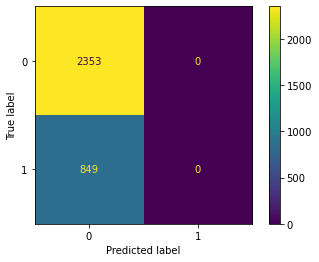

In [10]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions)).plot()

In [11]:
# accurate score
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions, y_test))

0.7348532167395377


In [12]:
# f1 score
print("f1 score: ", f1_score(y_test, predictions))

f1 score:  0.0


In [13]:
# Use GridSearchCV to tune the parameter of each of the above models.
# Looks for optimization of hyperparameters over predefined values by fitting the model on the training set
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {'C': [0.0001, 0.01, 0.1, 1], 'solver': ['lbfgs', 'liblinear'], 'penalty': ['l1', 'l2'], 'random_state': [1, None], 'max_iter': [10000]}

In [15]:
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)

In [16]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=

[CV 1/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.768 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.761 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.765 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.764 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=n

[CV 1/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.782 total time=   0.2s
[CV 2/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.772 total time=   0.1s
[CV 3/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.767 total time=   0.2s
[CV 4/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.779 total time=   0.2s
[CV 5/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.769 total time=   0.2s
[CV 1/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.772 total time=   0.0s
[CV 3/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.767 total time=   0.0s
[CV 4/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.779 tota

/Users/hwan/opt/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hwan/opt/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hwan/opt/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/hwan/opt/anaconda3/envs/m

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.01, 0.1, 1], 'max_iter': [10000],
                         'penalty': ['l1', 'l2'], 'random_state': [1, None],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=3)

In [17]:
# Parameter setting that gave the best results
grid.best_estimator_

LogisticRegression(C=1, max_iter=10000, penalty='l1', random_state=1,
                   solver='liblinear')

In [18]:
grid_predictions = grid.predict(X_test)

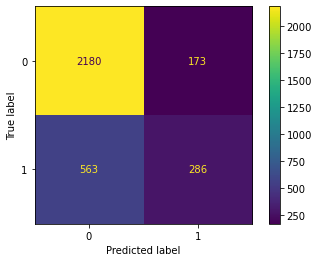

In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, grid_predictions)).plot()

In [20]:
# accurate score
from sklearn.metrics import accuracy_score
print(accuracy_score(grid_predictions, y_test))

0.7701436602123672


In [21]:
# f1 score
print("f1 score: ", f1_score(y_test, grid_predictions))

f1 score:  0.43730886850152906


In [22]:
# Drop some columns
new_df = processed_data.drop('training_hours',axis=1)
new_df.head()

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,target,company_type_Early Stage Startup,company_type_Funded Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
0,0.268051,0.942116,1.0,0.0,1.000000,0.000,0.25,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890497,0.654691,0.0,0.0,0.736842,0.375,1.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.346306,0.351297,0.0,0.0,0.210526,0.000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.995836,0.680639,0.0,0.0,0.000000,0.000,0.00,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019893,0.636727,1.0,0.5,1.000000,0.375,1.00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('target',axis=1), 
                                                    new_df['target'], test_size=0.20, 
                                                    random_state=42)

In [24]:
new_grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)

In [25]:
new_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=10000, penalty=l1, random_state=1, solver=liblinear;, score=0.747 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=

[CV 2/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.762 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.764 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.768 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.761 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solver=liblinear;, score=0.767 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=10000, penalty=l2, random_state=None, solv

[CV 5/5] END C=1, max_iter=10000, penalty=l2, random_state=1, solver=lbfgs;, score=0.770 total time=   0.1s
[CV 1/5] END C=1, max_iter=10000, penalty=l2, random_state=1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=1, max_iter=10000, penalty=l2, random_state=1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=1, max_iter=10000, penalty=l2, random_state=1, solver=liblinear;, score=0.768 total time=   0.0s
[CV 4/5] END C=1, max_iter=10000, penalty=l2, random_state=1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=10000, penalty=l2, random_state=1, solver=liblinear;, score=0.770 total time=   0.0s
[CV 1/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 3/5] END C=1, max_iter=10000, penalty=l2, random_state=None, solver=lbfgs;, score=0.768 total time=   0.2s

/Users/hwan/opt/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hwan/opt/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hwan/opt/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/hwan/opt/anaconda3/envs/m

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.01, 0.1, 1], 'max_iter': [10000],
                         'penalty': ['l1', 'l2'], 'random_state': [1, None],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=3)

In [26]:
# Parameter setting that gave the best results if some columns are removed.
new_grid.best_estimator_

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')

In [27]:
new_grid_predictions = new_grid.predict(X_test)

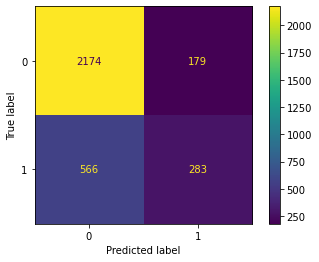

In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, new_grid_predictions)).plot()

In [29]:
# accurate score
from sklearn.metrics import accuracy_score
print(accuracy_score(new_grid_predictions, y_test))

0.7673329169269206


In [30]:
# f1 score
print("f1 score: ", f1_score(y_test, new_grid_predictions))

f1 score:  0.43173150266971777


In [31]:
# Result
print("If we removed some unrelated features, we can improve the logistic regression model performance. If we removed some import features, it will degrade the logistic regression model performance.")

If we removed some unrelated features, we can improve the logistic regression model performance. If we removed some import features, it will degrade the logistic regression model performance.


In [32]:
print("'training_hours' is an important feature for the analytics")

'training_hours' is an important feature for the analytics
